<a href="https://colab.research.google.com/github/javed075/Cardiovascular_Risk_Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Cardiovascular Risk Prediction

##### **Project Type**    - Classification
##### **Contribution**    - Individual

#***BY-JAVED AHMAD (javedahmad075@gmail.com)***

# **Project Summary -**

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides, the patients' information. It includes over 4,000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

Approaches:-

**Step 1** - Viewing and cleaning data being the initials, we started with importing necessary libraries, mounting drive and storing data in variables for deriving meaningful insights. Next step being data analysis and visualization, where we analyzed our data distribution as univariate, bivariate and multivariate plots. Multicollinearity check was performed.

**Step 2** - We performed EDA and find many insght from the data.what factor is more responsible for the coronary heart deasese.

**Step 3** - Presence of null values would have created possible errors in the further steps, so we replaced numerical null values with median, as median is unaffected by outliers and categorical null values are replaced by mode. We also removed outliers which were irrelevant, as all outliers cannot be removed or replaced due to thier importance in risk prediction.

**Step 4** - As a part of feature engineering we added a new column BP using systolic and diastolic bp which were found to be highly correlated. Also cigsperday column was converted to categorical column. then we performed hot encoding to create dummy variables for categorical data, our data was highly imbalanced so we used SMOTE to create a balanced data.

**Step 5** - Last step was to perform model training using different algorithms, we tried logistic regression, KNN, Naive-Bayes, XGBclassifier, Random Forest. Evaluation metrics used for comparing models were f1 score and recall and auc score.


# **GitHub Link -**

#GitHub Link -https://github.com/javed075/Cardiovascular_Risk_Prediction.git

# **Problem Statement**

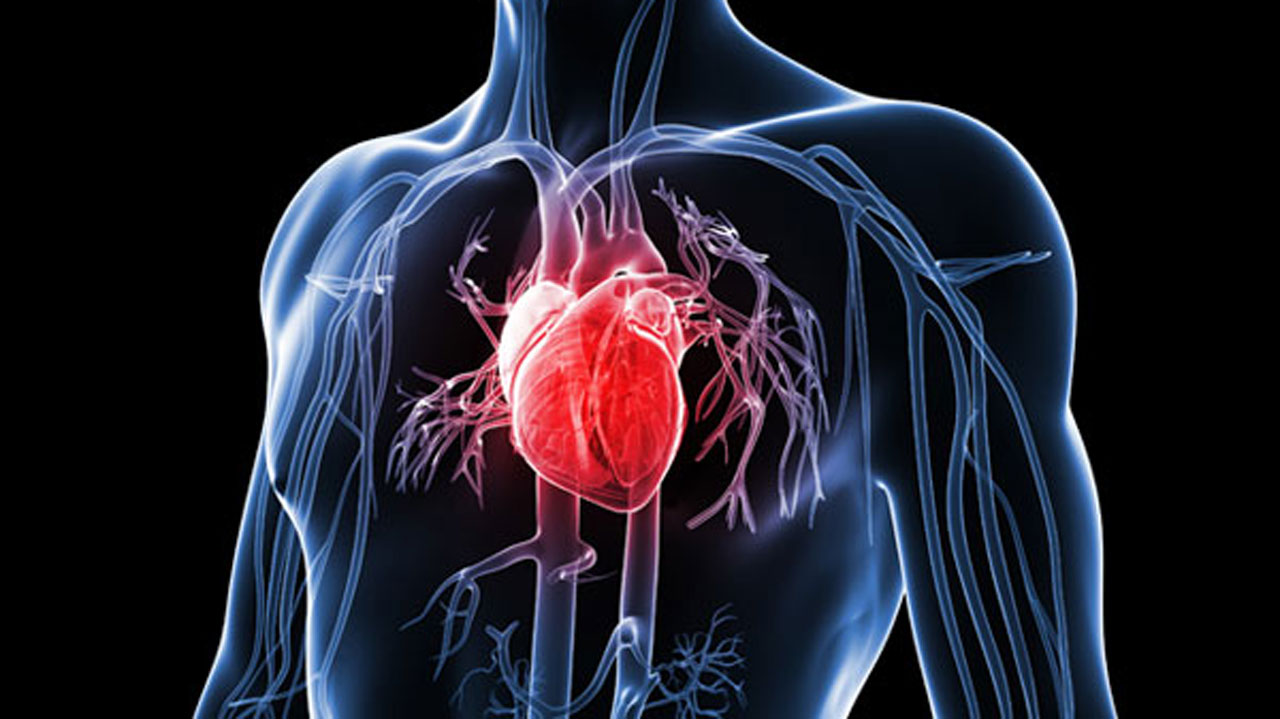

**The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides, the patients' information. It includes over 4,000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# import all necessary libararies.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import svm
from xgboost import XGBRFClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# load the data set 
df=pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone project 3/data_cardiovascular_risk.csv')

### Dataset First View

In [ ]:
# top 5 row of the data set
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Dataset Rows & Columns count

In [ ]:
# number of rows and no of column count
rows=df.shape[0]
columns=df.shape[1]
print(f'Number of rows in dataset are {rows}')
print(f'Number of columns in dataset are {columns}')

Number of rows in dataset are 3390
Number of columns in dataset are 17


* by this operation we know that we have 3390 rows and 17 columns.

### Dataset Information

In [ ]:
# basic details of data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

* by above operation we know that we have 16 coloumns. From which all are int and float data type only two column are string data type.We have many column who contains many null vaues.

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicate=df.duplicated().sum()
duplicate

0

We can see that we no duplicate values in our data set.

#### Missing Values/Null Values

In [ ]:
# defining function for the no of missing values ,% missing values,unique values,and data type.
def basic_details (df):
  missing_values=df.isnull().sum()
  missing_values_percentage=(df.isnull().sum()/len(df))*100
  unique_value=df.nunique()
  details_table=pd.concat([missing_values,missing_values_percentage,unique_value],axis=1)
  details_table=details_table.rename(columns={0:'No of missing values',1:'% of missing values',2:'No of unique values'})
  details_table['data type']=df.dtypes
  details_table=details_table.sort_values('% of missing values',ascending=False).round(2)
  return  details_table

In [ ]:
# calling the function
basic_details(df)

,No of missing values,% of missing values,No of unique values,data type
glucose,304,8.97,132,float64
education,87,2.57,4,float64
BPMeds,44,1.30,2,float64
totChol,38,1.12,240,float64
cigsPerDay,22,0.65,32,float64
BMI,14,0.41,1259,float64
heartRate,1,0.03,68,float64
id,0,0.00,3390,int64
diaBP,0,0.00,142,float64
sysBP,0,0.00,226,float64


* we can see that we have lot of missing values.for better performance of our algorithm we have to handle the null values.

## ***2. Understanding Your Variables***

In [ ]:
# data set column name
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

#### Column Details

| Field | Description || Field | Description |
|-------|-------------||-------|-------------|
|Age|Age of the patient||totChol|Cholestrol measure|
|Education|Education of the patient||sysBP|systolic blood pressure|
|Sex|male or female("M" or "F")||diaBP|diastolic blood pressure|
|is_Smoking|Whether smoking currently or not||BMI|Body Mass Index|
|cigsPerDay|Cigarettes smoked per day||heartRate|Heart Rate Measure|
|BPMeds|whether or not the patient was on blood pressure medication||glucose|Level of glucose in th body|
|prevalentStroke|whether or not the patient had previously had a stroke||prevalentHyp| whether or not the patient was hypertensive |
|diabetes|Patient has Diabetes or not||TenYearCHD|10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”|

In [ ]:
# basic summary of numerical column like mean median min max count etc
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


### Check Unique Values for each variable.

In [ ]:
# find all unique values of all the columns
for col in df.columns:
  uniques_values=df[col].unique()
  print(col,uniques_values)

id [   0    1    2 ... 3387 3388 3389]
age [64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 52 48 37 65 57 68 67 33 66 69 70 32]
education [ 2.  4.  1.  3. nan]
sex ['F' 'M']
is_smoking ['YES' 'NO']
cigsPerDay [ 3.  0. 10. 20. 30. 35. 40. 15.  9. 60. 17. 25.  5. 43.  7. 50. 19. 18.
  1. 45.  2.  6. nan 11.  8.  4. 14. 16. 23. 13. 12. 70. 38.]
BPMeds [ 0. nan  1.]
prevalentStroke [0 1]
prevalentHyp [0 1]
diabetes [0 1]
totChol [221. 212. 250. 233. 241. 272. 238. 295. 220. 326.  nan 210. 213. 227.
 188. 240. 257. 267. 232. 199. 175. 164. 226. 248. 245. 279. 273. 252.
 198. 266. 216. 237. 193. 293. 180. 206. 215. 208. 262. 270. 292. 346.
 202. 340. 334. 351. 235. 243. 196. 275. 186. 190. 268. 234. 264. 156.
 260. 225. 183. 246. 174. 288. 254. 150. 211. 161. 274. 214. 195. 165.
 302. 265. 251. 205. 209. 258. 222. 247. 189. 173. 281. 382. 181. 200.
 244. 218. 261. 229. 291. 312. 170. 176. 290. 204. 239. 162. 314. 194.
 271. 313. 305. 285. 169. 224. 201. 185

#**Data Wrangling**

## **Univariate Analysis**

#Chart -1

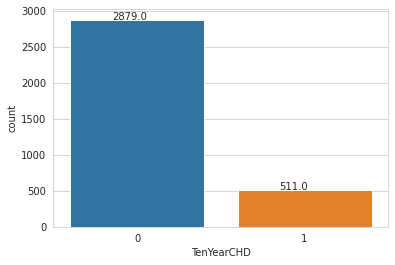

In [ ]:
# Countplot of target variable
sns.set_style('whitegrid')
ax=sns.countplot(x='TenYearCHD', data=df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))


we have used bar charts to represent dependent variable ditribution, Vertical bar charts are useful to compare different categorical or discrete variables as long as they are too many categories to compare.

Distribution of dependent variable shows that very less number of people (511) are prone to cardiovascular risk. Graph clearly shows that 2879 people are out of risk zone.

#Chart-2

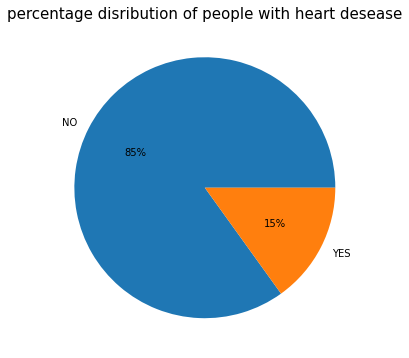

In [ ]:
# pie chart of the depend variable
plt.figure(figsize=(10, 6))
new=df['TenYearCHD'].value_counts()
plt.pie(new, autopct='%.0f%%',labels=['NO','YES'])
plt.title('percentage disribution of people with heart desease',fontsize=15)
plt.show()


By above pie chart it clearly seen that 85% people are free from cardiovascular disease and 15% people come under the risk of heart disease.

#Chart-3

In [ ]:
numerical_features=['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']
numerical_features

['age',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

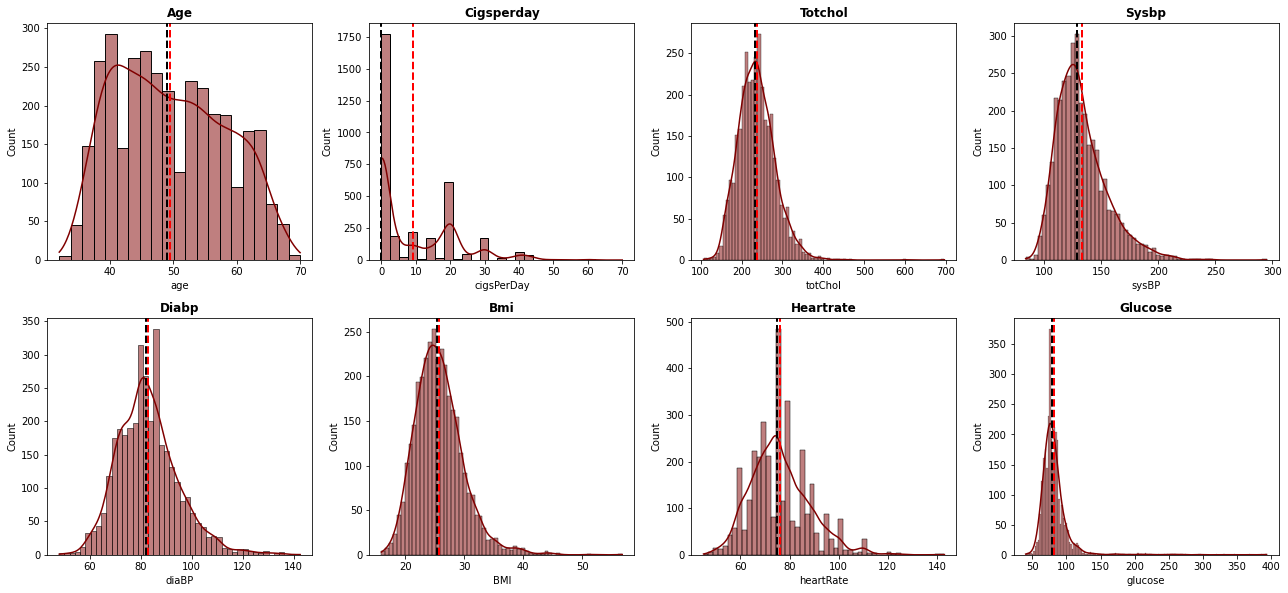

In [ ]:
# histogram of all numerical column
plt.figure(figsize=(18,12))
for n,col in enumerate(numerical_features):
  ax=plt.subplot(3,4,n+1)
  sns.histplot(df[col],kde=True,color='maroon')
  ax.axvline(df[col].mean(), color='red', linestyle='dashed', linewidth=2)
  ax.axvline(df[col].median(), color='black', linestyle='dashed', linewidth=2)
  plt.title(f'{col.title()}',weight='bold')
  plt.tight_layout()
  

*   Age distribution displays a mean or avrage of 49.5 and the data ranges from 35 to 70.
*Cigrate perday has random distribution. most of the people are no smoker and some people are highly smoked around 70.
*   TotChol has range from 100 to 700 with an average of around 240.

*   SysBP has range from 90 to 300 with an average of around 140.
*   DiaBP has range from 55 to 140 with an average of around 82-83.

*   BMI represents a normal distribution with most values between 20-40 and few exceeding values, it has an average ofaround 25.
*   HeartRate distribution displays a mean or average of 75 and the data ranges from 55 to 140.

*   Glucose distribution is highly skewed with its lowest value being 50 to its highest value 400 average of this distribution is around 80.


#Chart-4

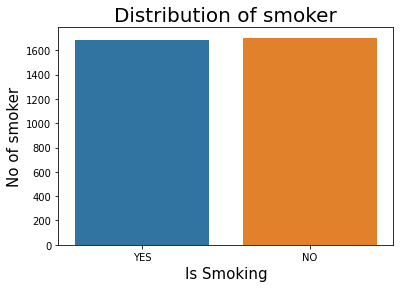

In [ ]:
# distibution of smoker
ax=sns.countplot(df['is_smoking'])
ax.set_ylabel('No of smoker',fontsize=15)
ax.set_xlabel('Is Smoking',fontsize=15)
plt.title('Distribution of smoker',fontsize=20)
plt.show()

By above chart it clearly seen that distribution of smoker and non smoker distibute equally.

## **Bivariate Analysis**

#Chart-5

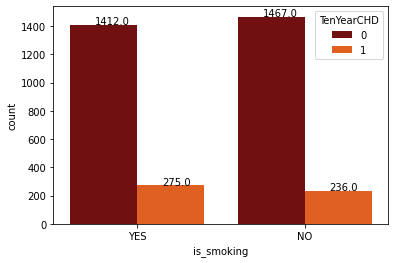

In [ ]:
# CHD among the people who smoke and the ones who don't 
ax=sns.countplot(data=df, x='is_smoking', hue='TenYearCHD',palette='gist_heat')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.81))
   

* Above plot shows that even if the person is not smoking he/she is at equal risk of cardiovascular diseases when compared to people who are smoking.

#Chart-6

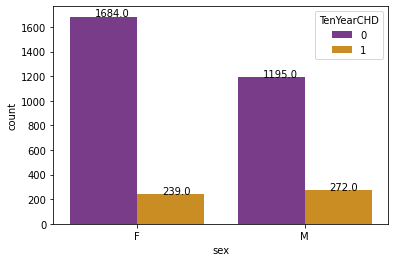

In [ ]:
#CHD among the male and femle
ax=sns.countplot(data=df, x='sex', hue='TenYearCHD',palette='CMRmap')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.81))
   

* By above it clearly seen that female are less prone to cardiovascular risks as compared to male.

# Chart-7

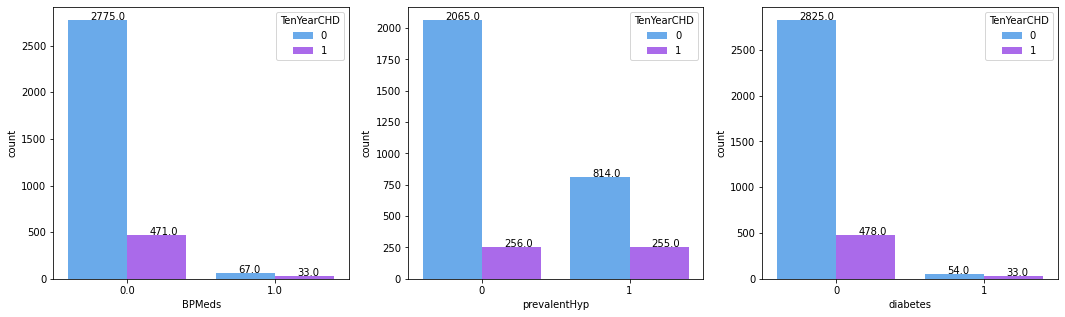

In [ ]:
data=['BPMeds','prevalentHyp','diabetes']
plt.figure(figsize=(18,5))
for n, cols in enumerate(data):
  ax=plt.subplot(1,3,n+1)
  sns.countplot(data=df,x=cols,hue='TenYearCHD',palette='cool')
  for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.81))

*  **From chart-1** it cleary shows that Very less number of people were found to be taking BP medicines and 33% of them were at higher risk to cardiovascular disease.

* **from chart-2**  shows that people already having hypertension are more prone to cardiovascular disease(23.8%) as compared to people not having hypertension(6.89%).

* Special health care plans, checkup plans and insurance plans can be designed for paitents with hypertension issues, which in turn provides convinience and safety to paitents and generate more revenue for the company.

*  **From chart-3** Diabetic people are at very high risk of getting cardiovascular disease. As the graph shows among 87 people 33 people are at higher risk of getting cardiovascular disease.



#Chart-8

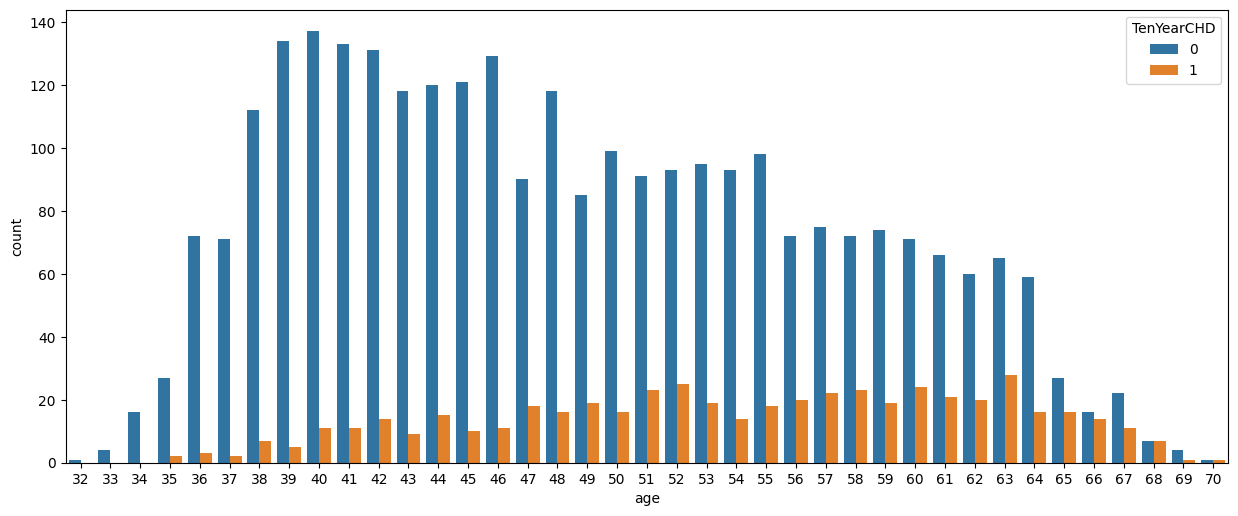

In [ ]:
plt.figure(figsize=(15,6),dpi=100)
ax=sns.countplot(x='age',data=df,hue='TenYearCHD')

 Above graph clearly says that With increasing age, chances of having cardiovascular disease increases. As the graph shows people from age 50 acquires higher risk of cardiovascular disease.

#Chart-9

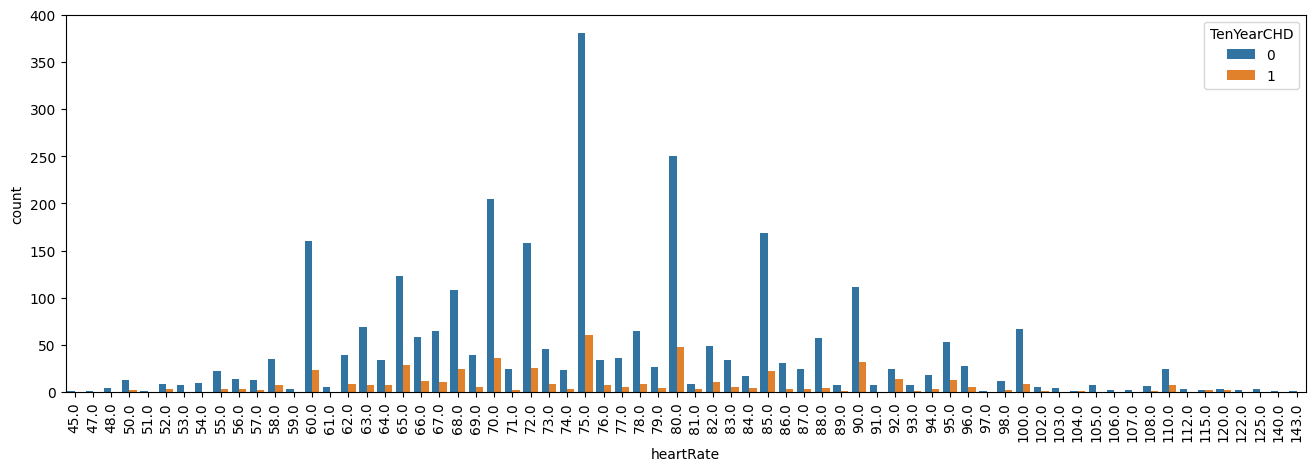

In [ ]:
#CHD chances with respect to heartrate
plt.figure(figsize=(16,5), dpi=100)
sns.countplot(data=df, x='heartRate', hue='TenYearCHD')
plt.xticks(rotation=90);

* Heart rate and CHD risk has also been displayed by using multiple bar charts. Multiple bar charts are extremely useful if you want to present a large amount of information in a small amount of space.

* In the dataset of around 4000 individual only ~ 380 (~ 9.5%) individuals are having normal heart rate, i.e (75 bpm).

#Chart-10

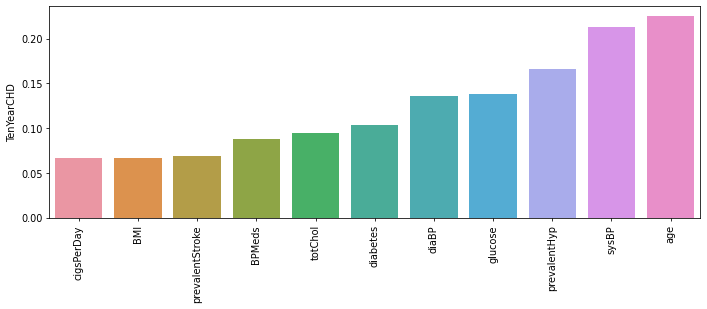

In [ ]:
 # correlation between column and CHD in increasing order
 corr=pd.DataFrame(df.corr()['TenYearCHD'].sort_values()[3:-1])
 plt.figure(figsize=(12,4),dpi=70)
 sns.barplot(data=corr,x=corr.index, y='TenYearCHD')
 plt.xticks(rotation=90)
 plt.show()


 The above plot shows correlation of independent variables with dependent variable. we can see that age column is highly correlated to cardiovascular risk, followed by systolic blood pressure,prevalent hypertension and glucose level.

## **Multivariate Analysis**

#Chart-11

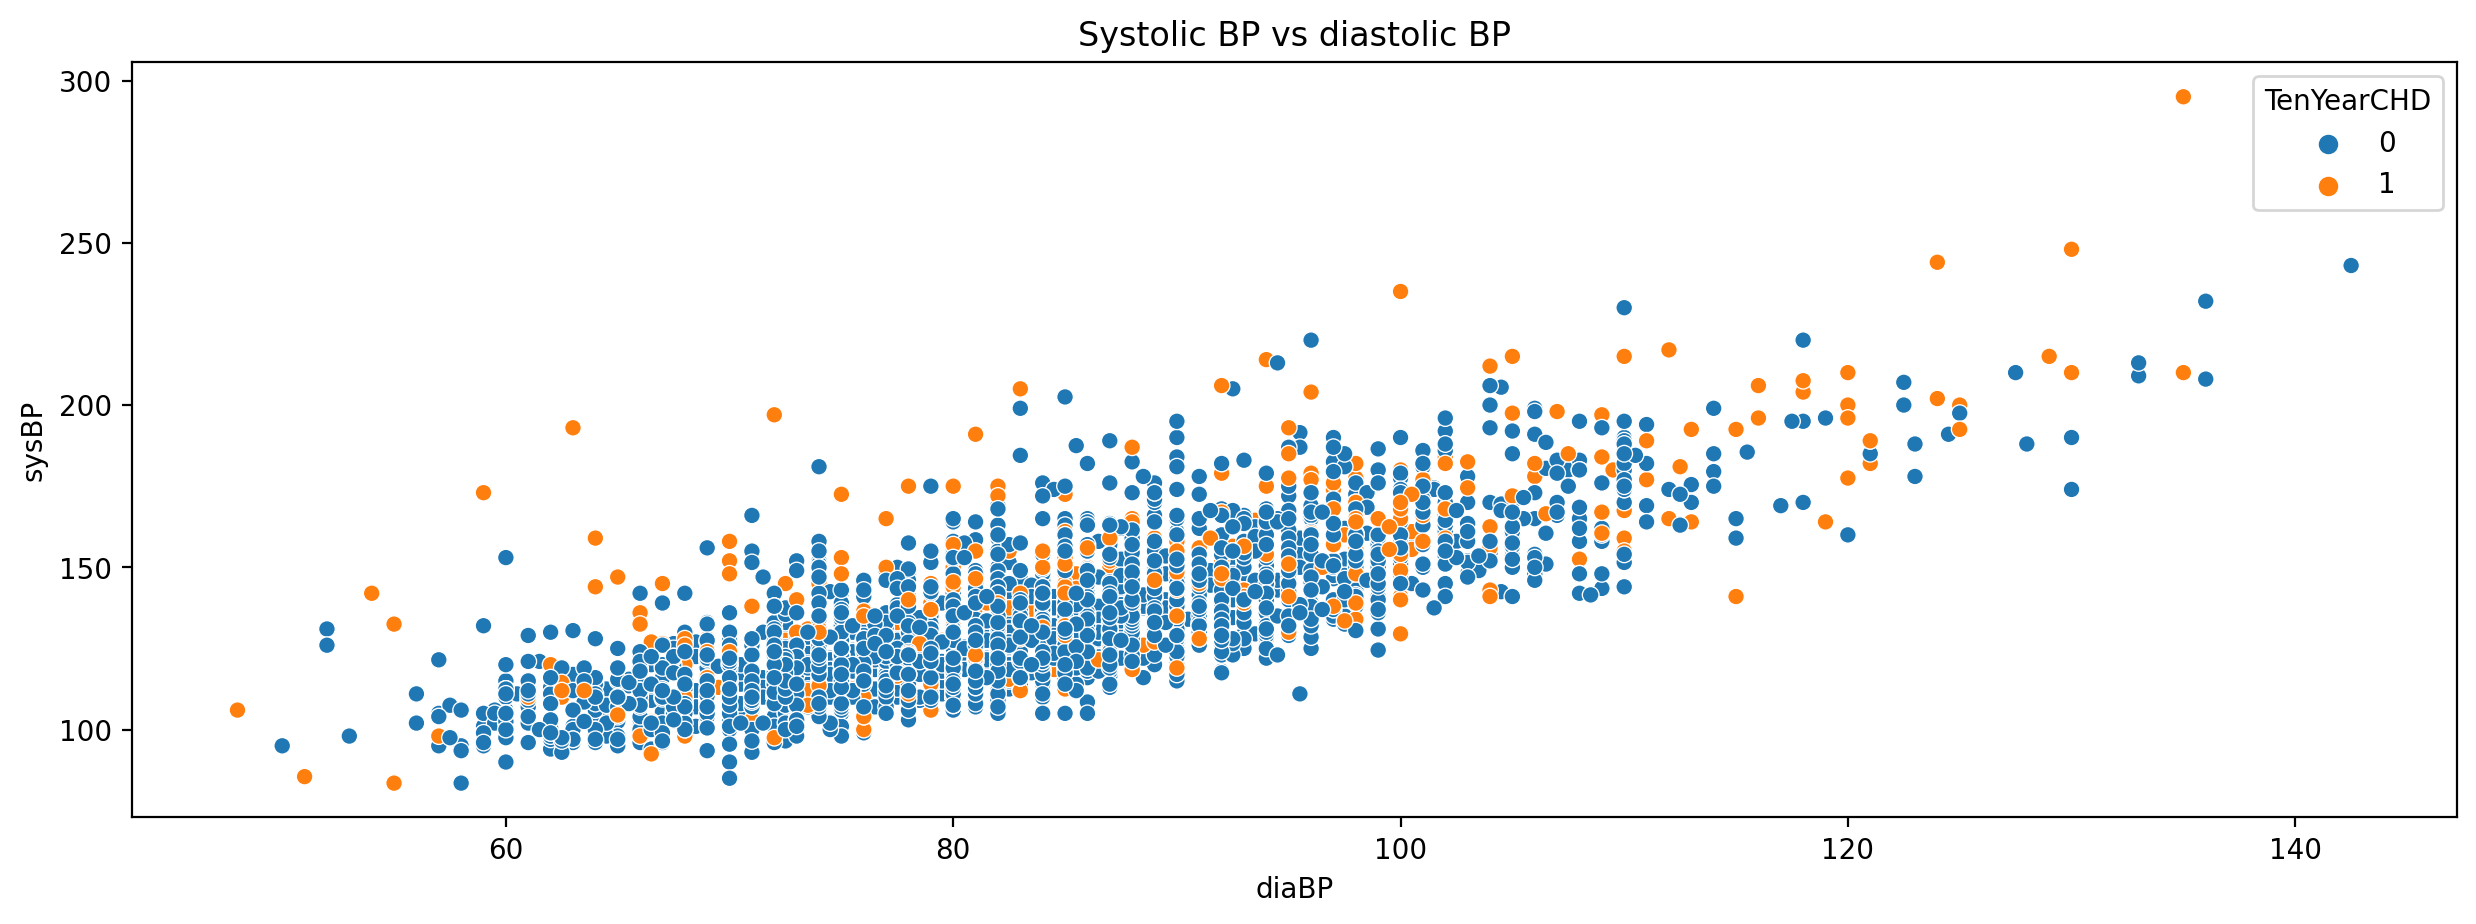

In [ ]:
# correaltion between Systolic BP and diastolic BP with CHD
plt.figure(figsize=(15,5),dpi=200)
sns.scatterplot(data=df,x='diaBP',y='sysBP',hue='TenYearCHD')
plt.title('Systolic BP vs diastolic BP')
plt.show()

* We have used scatterplot as they are used to determine association of variables i.e, how much one variable is affected by another.

* Above graph shows that systolic blood pressure is positively correlated to diastolic blood pressure. As systolic and diastolic pressure increases risk of getting cardiovascular diseases also increases.

#Chart-12

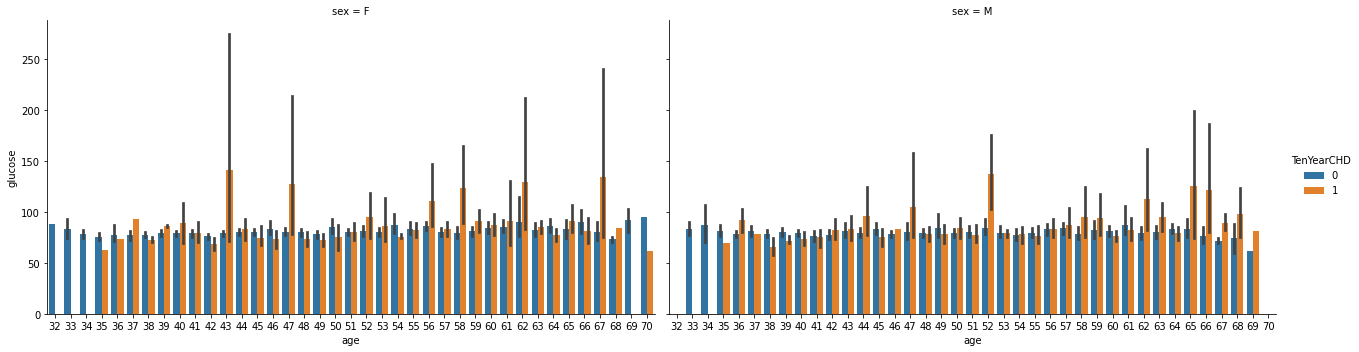

In [ ]:
# Chart - 14 visualization code
sns.catplot(x="age", y="glucose", hue="TenYearCHD",
            col="sex",aspect=1.8,
            kind="bar", data=df)
plt.show()

 * by above plot it clearly seen that Glucose levels are high in females as compared to males which increases the risk of CHD.

#Chart_13

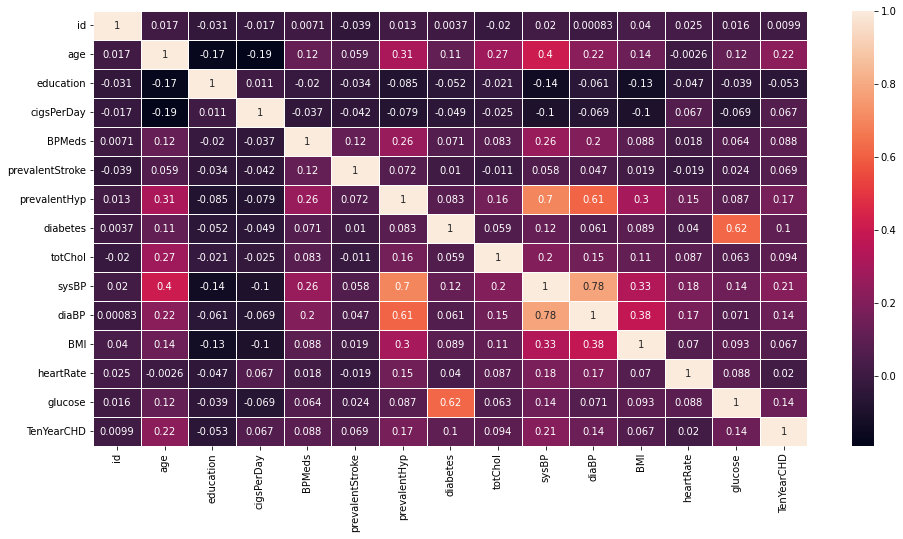

In [ ]:
# Correlation Heatmap visualization code
corr=df.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(corr, annot=True, linewidths=1.0)
plt.show()

* Heatmap clearly shows that two of the columns namely systolic blood pressure and diastolic blood pressure are highly correlated. systolic BP and hypertension is also correlated.

 This correlation is useful in our model training.

## ***Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Replacing null values with median continuos data type 
df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].median())
df['totChol'] = df['totChol'].fillna(df['totChol'].median())
df['BMI'] = df['BMI'].fillna(df['BMI'].median())
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].median())
df['glucose'] = df['glucose'].fillna(df['glucose'].median())
# Replacing null values with mode for 
df['education'] =df['education'].fillna(df['education'].mode()[0])
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].mode()[0])

In [ ]:
# checking again for null values
df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

 As for the numerical columns we used median to replace null values present we could have used mean value but as we know that mean is affected by outliers whereas median is not affected by outliers. For the categorical data we used mode(returns a repeated value which has been repeated highest) to replace null values 

### 2. Handling Outliers

In [ ]:
numerical_columns = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

In [ ]:
def remove_outliers (df1,column):
  plt.figure(figsize=(15,5))
  plt.subplot(1,2,1)
  plt.title('Before treating outliers')
  sns.boxplot(x=df[column],color='red')
  plt.subplot(1,2,2)
  sns.distplot(df[column],color='red')
  df1=df1[((df1[column]-df1[column].mean())/df1[column].std()).abs()<3]
  df1=df1[((df1[column]-df1[column].mean())/df1[column].std()).abs()>-3]

  plt.figure(figsize=(15,5))
  plt.subplot(1, 2, 1)
  plt.title('After Treating outliers')
  sns.boxplot(x=df1[column])
  plt.subplot(1, 2, 2)
  sns.distplot(df1[column])

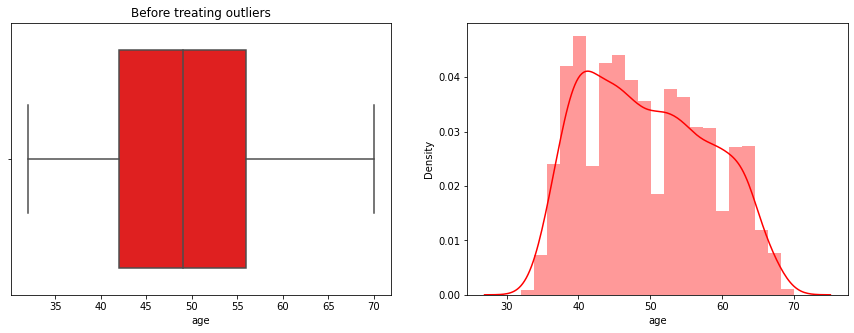

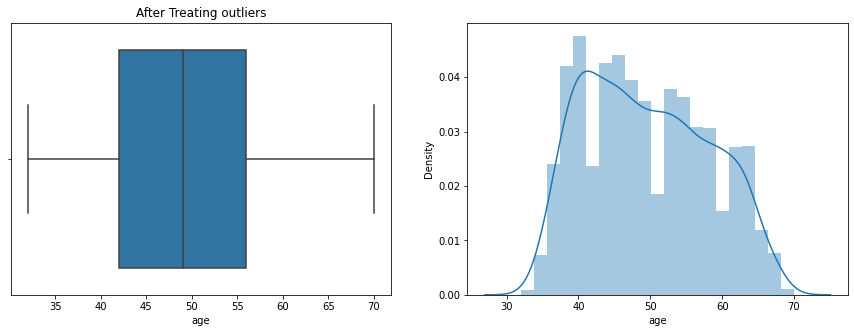

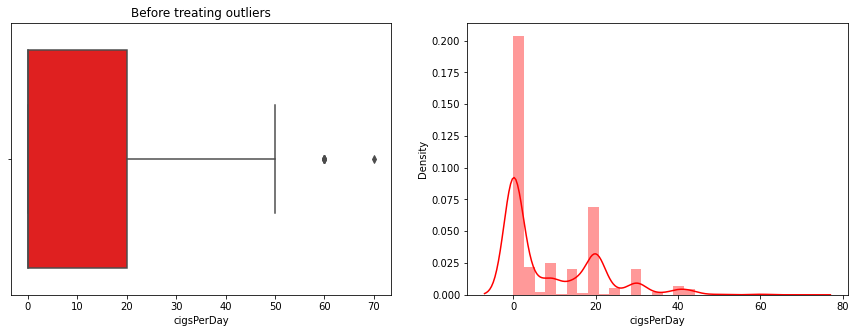

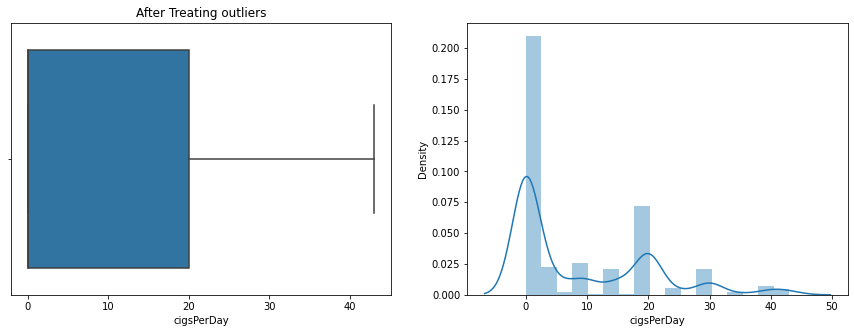

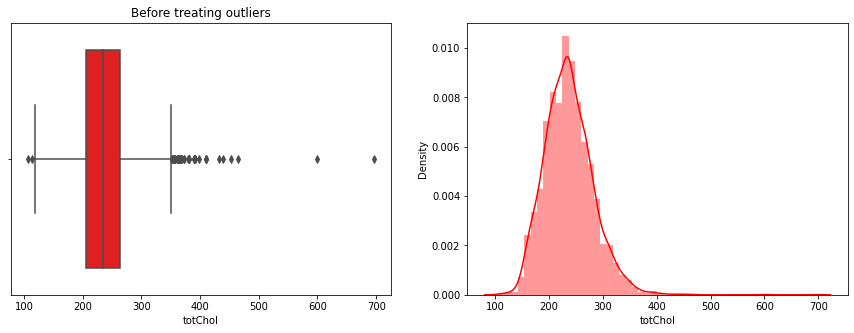

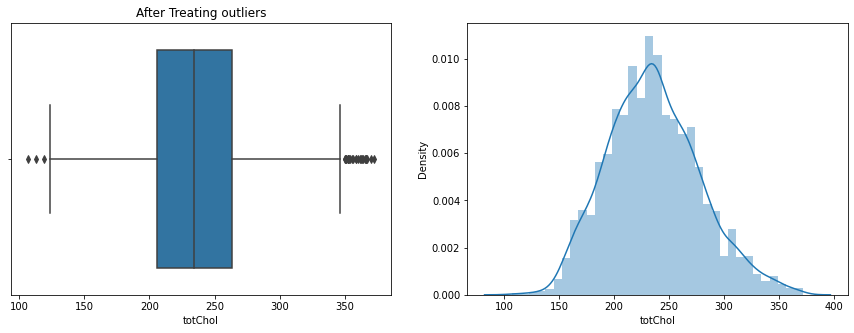

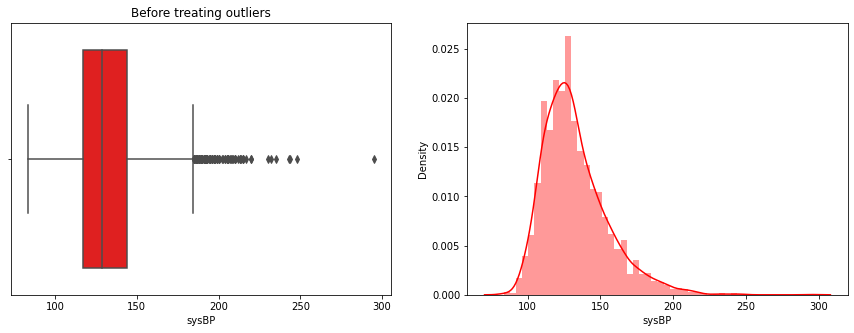

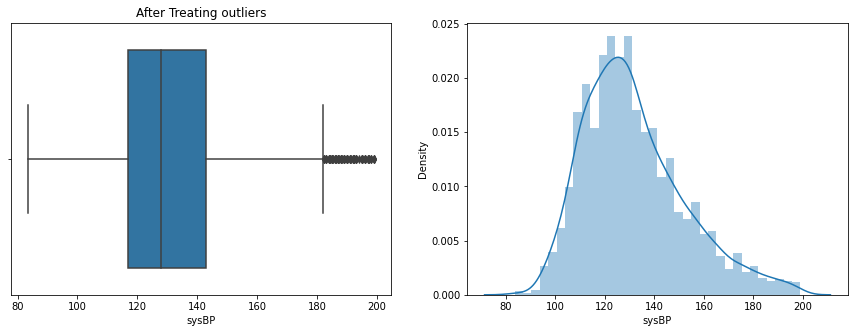

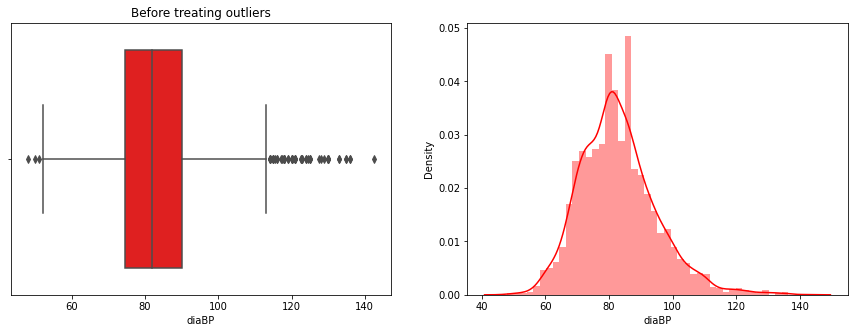

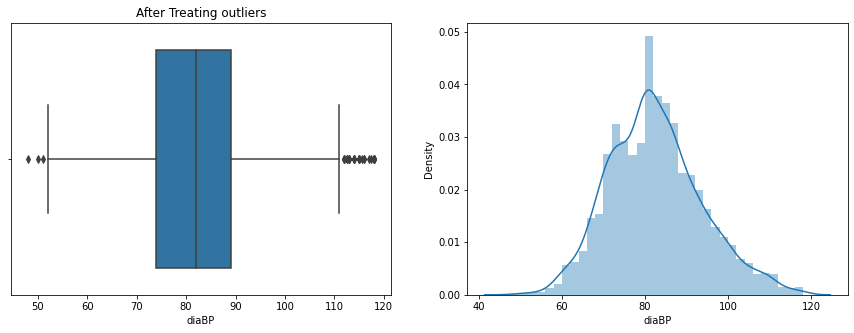

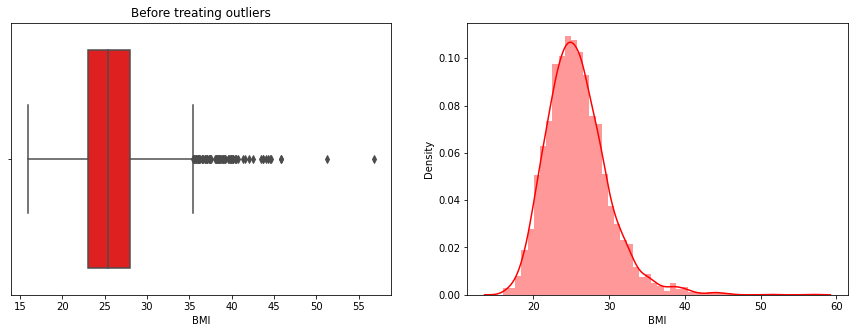

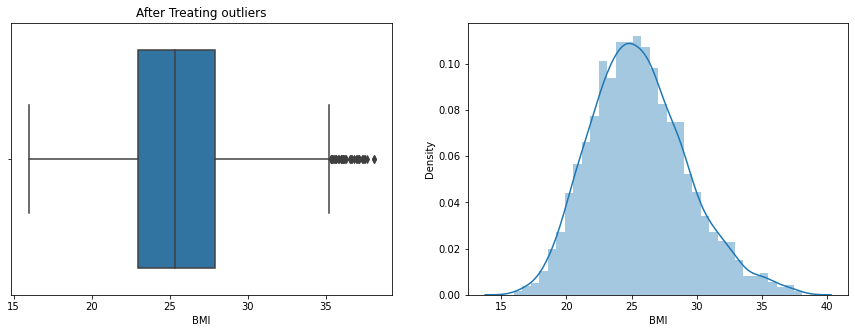

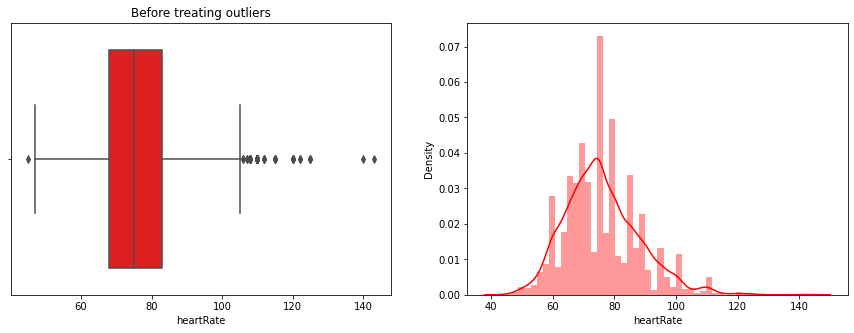

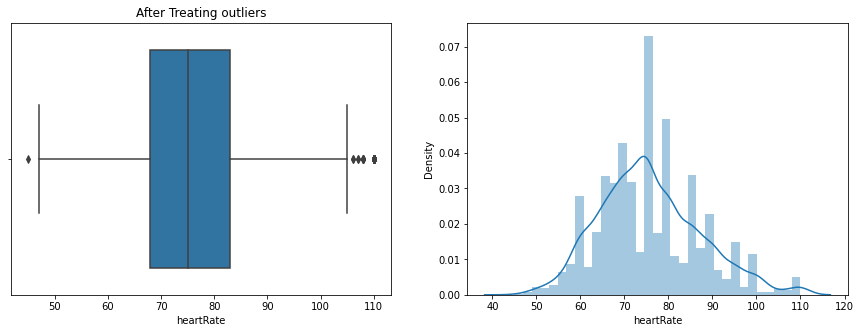

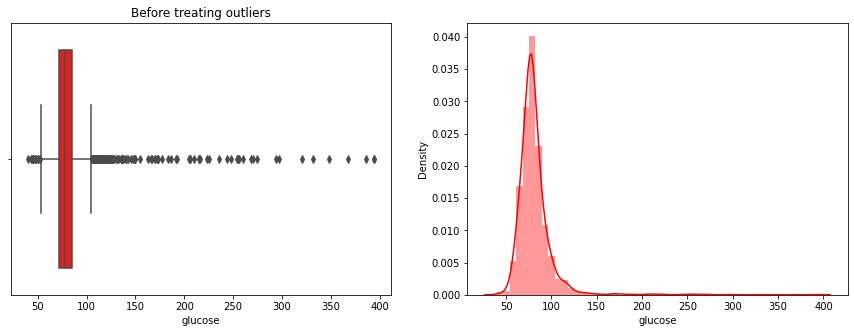

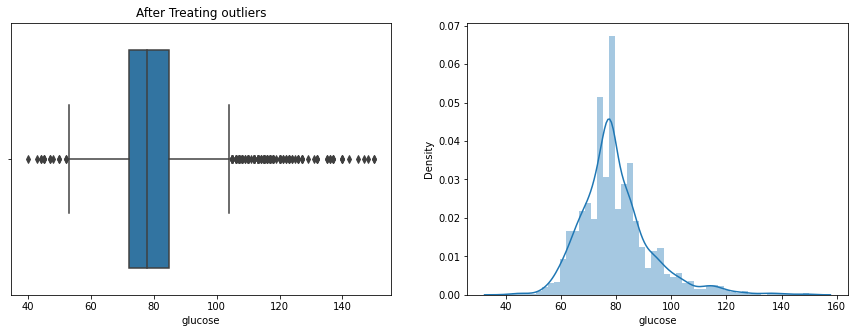

In [ ]:
for column in numerical_columns :
  remove_outliers(df,column)

We used Z score treatment for treating outliers. Z score is an important concept in statistics. Z score is also called standard score. This score helps to understand if a data value is greater or smaller than mean and how far away it is from the mean. More specifically, Z score tells how many standard deviations away a data point is from the mean. We are not supposed to remove all the outliers as we can see from the above boxplots that we have a lot of outliers in few of the columns but we cannot remove or replace as high values of BMI, BP, etc show that patient has high risk of cardivascular disease, if we remove these values we might get false results during model predictions. but few vlues wivh were baseless such as BMI value of 0 has to be removed. so in the above charts we have removed irrelevant outliers.

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# Adding a new column BP

In [ ]:
df['BP']=0
df.loc[(df['sysBP'] < 120) & (df['diaBP'] < 80), 'BP'] = 1
df.loc[((df['sysBP'] >= 120) & (df['sysBP'] < 130)) &
         ((df['diaBP'] < 80)), 'BP'] = 2

df.loc[((df['sysBP'] >= 130) & (df['sysBP'] < 140)) |
         ((df['diaBP'] >= 80) & (df['diaBP'] < 90)), 'BP'] = 3

df.loc[((df['sysBP'] >= 140) & (df['sysBP'] < 180)) |
         ((df['diaBP'] >= 90) & (df['diaBP'] < 120)), 'BP'] = 4

df.loc[(df['sysBP'] >= 180) | (df['diaBP'] >= 120), 'BP'] = 5

# drop the columns name 'sysBP'  and 'diaBP' from data set
cols_BP = ['sysBP', 'diaBP']
df.drop(cols_BP, axis= 1, inplace= True)

In [ ]:
df['cigsPerDay'].value_counts()

0.0     1725
20.0     606
30.0     176
15.0     172
10.0     106
9.0      104
5.0      103
3.0       79
40.0      62
1.0       48
25.0      44
43.0      42
35.0      17
2.0       17
6.0       14
8.0       10
7.0        8
60.0       8
18.0       7
4.0        7
50.0       6
17.0       5
23.0       5
11.0       4
12.0       3
13.0       3
19.0       2
16.0       2
45.0       2
14.0       1
70.0       1
38.0       1
Name: cigsPerDay, dtype: int64

In [ ]:
# change the cigrate per day column to catogorical column
for i in range (len(df)):
  if df['cigsPerDay'][i] == 0:
    df['cigsPerDay'][i] = 'No Consumption'
  elif df['cigsPerDay'][i] > 0 and df['cigsPerDay'][i] < 20:
    df['cigsPerDay'][i] = 'Average consumtion'
  else:
    df['cigsPerDay'][i] = 'High Consumption' 

### 4. Categorical Encoding -One Hot Encoding

In [ ]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,BP
0,0,64,2.0,F,YES,Average consumtion,0.0,0,0,0,221.0,25.38,90.0,80.0,1,4
1,1,36,4.0,M,NO,No Consumption,0.0,0,1,0,212.0,29.77,72.0,75.0,0,4
2,2,46,1.0,F,YES,Average consumtion,0.0,0,0,0,250.0,20.35,88.0,94.0,0,1
3,3,50,1.0,M,YES,High Consumption,0.0,0,1,0,233.0,28.26,68.0,94.0,1,4
4,4,64,1.0,F,YES,High Consumption,0.0,0,0,0,241.0,26.42,70.0,77.0,0,3


In [ ]:
# encode the catogorical column by one hot encoding
df=pd.get_dummies(df,columns=['sex', 'education','prevalentStroke', 'BPMeds', 'BP', 'cigsPerDay','diabetes'])
df.columns

Index(['id', 'age', 'is_smoking', 'prevalentHyp', 'totChol', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD', 'sex_F', 'sex_M', 'education_1.0',
       'education_2.0', 'education_3.0', 'education_4.0', 'prevalentStroke_0',
       'prevalentStroke_1', 'BPMeds_0.0', 'BPMeds_1.0', 'BP_1', 'BP_2', 'BP_3',
       'BP_4', 'BP_5', 'cigsPerDay_Average consumtion',
       'cigsPerDay_High Consumption', 'cigsPerDay_No Consumption',
       'diabetes_0', 'diabetes_1'],
      dtype='object')

Here - We had sex,education, prevalent stroke, BPMeds, Bp, cigsperday and is_smoking,diabetes  columns that were categorical but as is_smoking column was not that relevant we had to remove it, we had a similar sort of column which gave similar information that is cigs_per_day, if this column has 0 count that means is_smoking column will have 'no' as its value, therefore we removed it. prevalent hypertension another categorical column which was removed due to its high correlation with BP. As for other columns columns we have used pd.get_dummies to convert test into dummy variable.This method is used to convert categorical data into dummy or indicator variables.

#### 2. Feature Selection

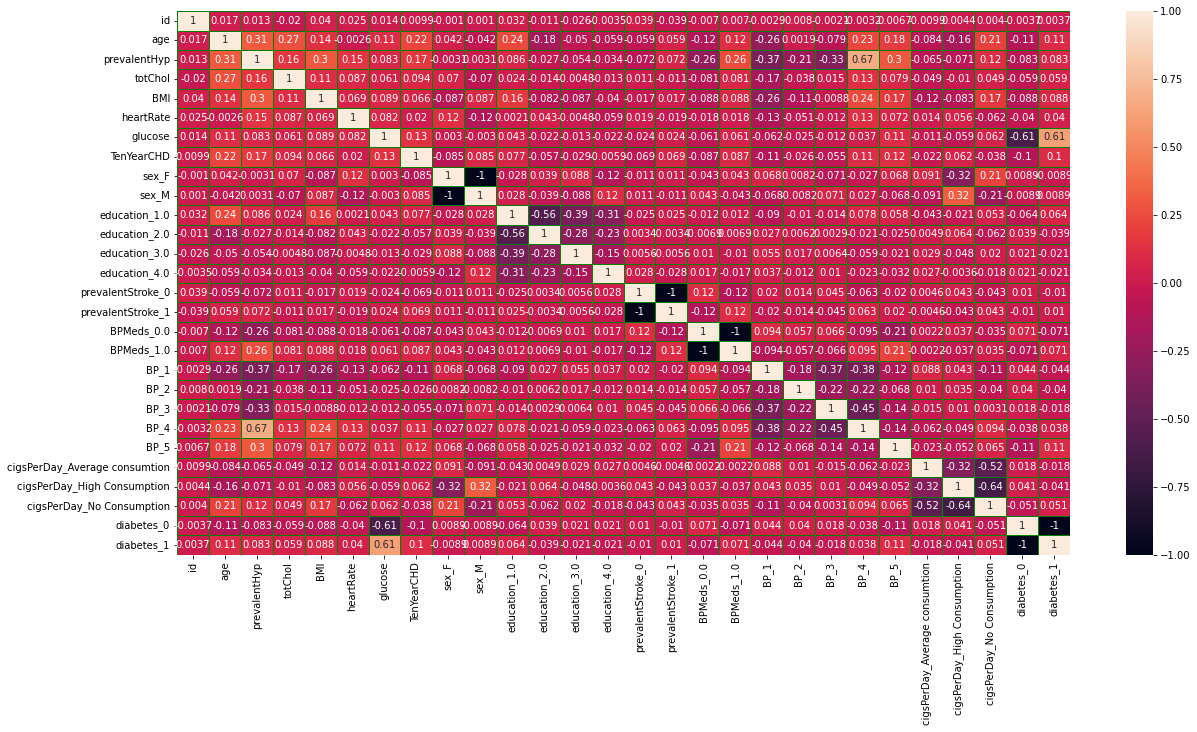

In [ ]:
# select the feature to avoid overfitting
corr1=df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr1, annot=True, linewidths=1.0,linecolor='Green')
plt.show()

By above heatmap we can seen that Prevalenthyp is higly corelated with the bp_4 column so we removed the bp_4 column. also we sen that  glucose is also corelated to the diabetes_1 so we drop one of that. also we drop the id column that is not relevent. after dropping all that features we made and modify our data set non corelated features.

In [ ]:
# remove unwanted features and highly corelared features for better performance
features=['age','prevalentHyp','totChol','BMI','heartRate','glucose','sex_M','education_1.0', 'education_2.0',
          'education_3.0','prevalentStroke_0','BPMeds_0.0','BP_1', 'BP_2', 'BP_3', 'BP_5',
          'cigsPerDay_Average consumtion','cigsPerDay_High Consumption', 'cigsPerDay_No Consumption','diabetes_0']

In [ ]:
# final dataset with non corelated column
Final_df=df[features]
Final_df.shape

(3390, 20)

### 5. Data Splitting

In [ ]:
# split the data in to the dependent and independent column
x=Final_df
y=df['TenYearCHD']
y.shape

(3390,)

In [ ]:
Final_df.shape

(3390, 20)

### 7. Handling Imbalanced Dataset

##SMOTE - Synthetic Minority Oversampling Technique

In [ ]:
# creating object of smote by importing smote
smote = SMOTE()
# fit predictor and target variable
x_smote,y_smote=smote.fit_resample(x,y)

Let's Resample the dataset to over come this imbalance. We will apply SMOTE (Synthetic Minority Oversampling Technique) to resample the data. It works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

In [ ]:
# split the data in to train and test data
x_train, x_test, y_train, y_test = train_test_split( x_smote,y_smote , test_size = 0.2, random_state = 0) 

### 6. Data Scaling

In [ ]:
# scale the our data set
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

We have used MinMaxScaler to scale the data. MinMaxScaler preserves the shape of the original distribution. It doesn't meaningfully change the information embedded in the original data. MinMaxScaler doesn't reduce the importance of outliers.

In [ ]:
df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

We can see that we have imbalanced data set. we can rely on the accuracy of such imbalnced data set .we have many technique to deal with that type of imbalanced dataset. 

In [ ]:
y_train.value_counts()

0    2326
1    2280
Name: TenYearCHD, dtype: int64

In [ ]:
y_test.value_counts()

1    599
0    553
Name: TenYearCHD, dtype: int64

we can see that by smote our data set is balanced. both the category that is 1 and 0 is equal in target variable.

## ***7. ML Model Implementation***

### **ML Model - 1 Logistic Regression**

In [ ]:
# ML Model - 1 Implementation
lgr=LogisticRegression(max_iter=1000)
# Fit the Algorithm
lgr.fit(x_train,y_train)

In [ ]:
#class prediction of y
y_pred_lgr = lgr.predict(x_test)
y_train_pred_lgr=lgr.predict(x_train)
probas_train_lgr=lgr.predict_proba(x_train)[:,1]
probas_test_lgr=lgr.predict_proba(x_test)[:,1]

In [ ]:
#getting all scores for Logistic Regression
train_accuracy_lgr = round(accuracy_score(y_train_pred_lgr,y_train), 3)
accuracy_lgr = round(accuracy_score(y_pred_lgr,y_test), 3)
precision_score_lgr = round(precision_score(y_pred_lgr,y_test,average='micro'), 3)
recall_score_lgr = round(recall_score(y_pred_lgr,y_test,average='micro'), 3)
f1_score_lgr = round(f1_score(y_pred_lgr,y_test,average='micro'), 3)
roc_score_train_lgr = round(roc_auc_score(y_train,probas_train_lgr), 3)
roc_score_test_lgr = round(roc_auc_score(y_test,probas_test_lgr), 3)

print("The accuracy on train data is ", train_accuracy_lgr)
print("The accuracy on test data is ", accuracy_lgr)
print("The precision on test data is ", precision_score_lgr)
print("The recall on test data is ", recall_score_lgr)
print("The f1 score  on test data is ", f1_score_lgr)
print("The roc_score on train data is ", roc_score_train_lgr)
print("The roc_score on test data is ", roc_score_test_lgr)

The accuracy on train data is  0.862
The accuracy on test data is  0.855
The precision on test data is  0.855
The recall on test data is  0.855
The f1 score  on test data is  0.855
The roc_score on train data is  0.926
The roc_score on test data is  0.915


In [ ]:
# for confusion matrics 
confusion_matrix_logistic=confusion_matrix(y_test,y_pred_lgr)
print(confusion_matrix_logistic)


[[496  57]
 [110 489]]


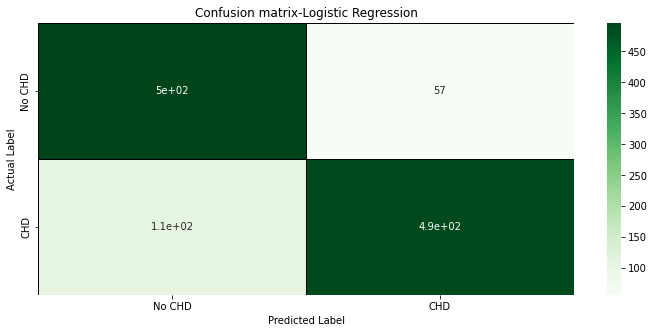

In [ ]:
# plot confusion matrix
plt.figure(figsize=(12,5))
ax=plt.subplot()
sns.heatmap(confusion_matrix_logistic,annot=True,ax=ax,cmap='Greens', linecolor='Black', linewidths=1.0)
# set labels and title
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion matrix-Logistic Regression')
labels=['No CHD','CHD']
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

In [ ]:
# ROC AUC CURVE
def plot_roc_curve(fpr,tpr):
  plt.figure(figsize=(12,5))
  plt.plot(fpr,tpr,color='orange',label=roc_score_test_lgr)
  plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend()
  plt.show()


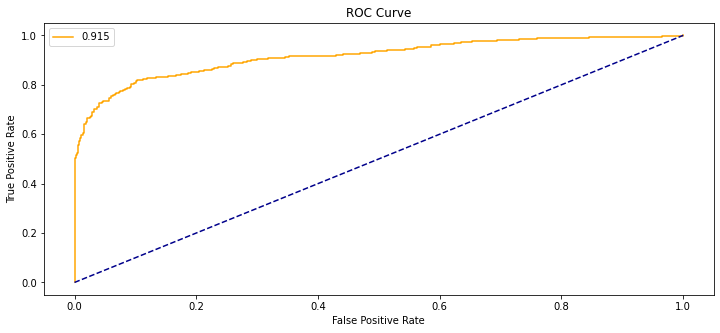

In [ ]:
# plot the ROC curve
fpr,tpr,thresold=roc_curve(y_test,probas_test_lgr)
plot_roc_curve(fpr,tpr)

By above logistic regression algorithm we found the AUC score around 0.91. which we good. IF we talk about precision ,recall and f1 score it is almost equal which is 0.85.
We know the our data set is imbalanced we can rely on accuracy we focus on fi score and auc score.


According to our dataset, data was highly imbalanced which is the only reason we will not be using accuracy as an evaluation metric, instead we will be considering f1 score which is average of recall and precision.

In case of cardiac diseases it is important to know number of positive cases than true positives, even if it if false positive there won't be any issue but if there is a false negative there might be serious issue so in this case calculating recall is way more important than precision, as recall gives us number of positives detected from total number of positives.

# Cross Validation & Hyperparameter Tuning

In [ ]:
# penalty in Logistic Regression Classifier
penalties = ['l1','l2', 'elasticnet', 'none']

# hyperparameter C
C= [ 0.001, 0.1, 0.5, 1, 1.5, 5, 10]

# Hyperparameter Grid
param_dict = {'penalty':penalties,
              'max_iter' : [100, 1000,2500],
              'C' : C }

In [ ]:
# Create an instance of the Logistic Regression
lgr = LogisticRegression()

# Grid search
lgr_grid = GridSearchCV(estimator=lgr,
                       param_grid = param_dict,
                       cv = 5, verbose=3, n_jobs = -1, scoring='roc_auc')
# fitting model
lgr_grid.fit(x_train,y_train)

In [ ]:
lgr_grid.best_estimator_

In [ ]:
lgr_grid.best_params_

{'C': 10, 'max_iter': 100, 'penalty': 'l2'}

In [ ]:
lgr_optimal_model = lgr_grid.best_estimator_

In [ ]:
#class prediction of y on train and test
y_pred_lgr_grid = lgr_optimal_model.predict(x_test)
y_train_pred_lgr_grid = lgr_optimal_model.predict(x_train)

# Get the probabilities on train and test
y_pred_prob_lgr_grid = lgr_optimal_model.predict_proba(x_train)[:,1]
y_test_pred_prob_lgr_grid = lgr_optimal_model.predict_proba(x_test)[:,1]

In [ ]:
#getting all scores for Logistic Regression after CV and Hyperparameter Tunning
train_accuracy_lgr_grid = round(accuracy_score(y_train_pred_lgr_grid,y_train), 3)
accuracy_lgr_grid = round(accuracy_score(y_pred_lgr_grid,y_test), 3)
precision_score_lgr_grid = round(precision_score(y_pred_lgr_grid, y_test,average='micro'), 3)
recall_score_lgr_grid = round(recall_score(y_pred_lgr_grid,y_test,average='micro'), 3)
f1_score_lgr_grid = round(f1_score(y_pred_lgr_grid,y_test,average='micro'), 3)
auc_lgr_grid = round(roc_auc_score(y_test,y_test_pred_prob_lgr_grid), 3)

print("The accuracy on train data is ", train_accuracy_lgr_grid)
print("The accuracy on test data is ", accuracy_lgr_grid)
print("The precision on test data is ", precision_score_lgr_grid)
print("The recall on test data is ", recall_score_lgr_grid)
print("The f1 on test data is ", f1_score_lgr_grid)
print("The auc on test data is ", auc_lgr_grid)

The accuracy on train data is  0.864
The accuracy on test data is  0.852
The precision on test data is  0.852
The recall on test data is  0.852
The f1 on test data is  0.852
The auc on test data is  0.918


GridSearchCV has been used for hyperparameter tuning. We perform hyperparameter tuning to maximize models predictive accuracy. In gridsearchCV approach, the machine learning model for a range of hyperparameter values. It searches for the best set of hyperparameter values from a grid of hyperparameter values.

After cross validation we found the auc score 0.91 and recall and f1 score is .85. which is exactly equal to the without hyperparameter tunning. 

### **ML Model - 2 KNN**

In [ ]:
# ML Model - 2 Implementation
knn = KNeighborsClassifier(n_neighbors = 5)
# Fit the Algorithm
knn.fit(x_train, y_train)
# Predict on the model
y_pred_knn = knn.predict(x_test)
y_train_pred_knn=knn.predict(x_train)
probas_train=knn.predict_proba(x_train)[:,1]
probas_test=knn.predict_proba(x_test)[:,1]

In [ ]:
train_accuracy_knn = round(accuracy_score(y_train_pred_knn,y_train), 3)
accuracy_knn = round(accuracy_score(y_pred_knn,y_test), 3)
precision_score_knn = round(precision_score(y_pred_knn,y_test,average='micro'), 3)
recall_score_knn = round(recall_score(y_pred_knn,y_test,average='micro'), 3)
f1_score_knn = round(f1_score(y_pred_knn,y_test,average='micro'), 3)
roc_score_train_knn = round(roc_auc_score(y_train,probas_train), 3)
roc_score_test_knn = round(roc_auc_score(y_test,probas_test), 3)

In [ ]:
print("The accuracy on train data is ", train_accuracy_knn)
print("The accuracy on test data is ", accuracy_knn)
print("The precision on test data is ", precision_score_knn)
print("The recall on test data is ", recall_score_knn)
print("The f1 score  on test data is ", f1_score_knn)
print("The roc_score on train data is ", roc_score_train_knn)
print("The roc_score on test data is ", roc_score_test_knn)

The accuracy on train data is  0.897
The accuracy on test data is  0.854
The precision on test data is  0.854
The recall on test data is  0.854
The f1 score  on test data is  0.854
The roc_score on train data is  0.967
The roc_score on test data is  0.907


K-Nearest Neighbors (KNN) is a popular supervised machine learning algorithm used for classification and regression tasks. 
after the model trainning we found.

AUC Score-0.90

recall-.85

f1 score-.85

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
knn = KNeighborsClassifier() 
# GridSearch to find the best parameters
param_grid = {'n_neighbors':np.arange(1,50)}
knn_cv= GridSearchCV(knn, param_grid, cv=5)
# Fit the Algorithm
knn_cv.fit(x_train, y_train)
# Predict on the model
knn_cv_y_pred = knn_cv.predict(x_train)
knn_y_pred_proba = knn_cv.predict_proba(x_test)[:,1]

In [ ]:
knn_cv.best_estimator_

In [ ]:
knn_cv.best_params_

{'n_neighbors': 2}

In [ ]:
knn_optimal_model = knn_cv.best_estimator_

In [ ]:
#class prediction of y on train and test
y_pred_knn_cv = knn_optimal_model.predict(x_test)
y_train_pred_knn_cv = knn_optimal_model.predict(x_train)

# Get the probabilities on train and test
y_pred_prob_knn_cv = knn_optimal_model.predict_proba(x_train)[:,1]
y_test_pred_prob_knn_cv = knn_optimal_model.predict_proba(x_test)[:,1]

In [ ]:
#getting all scores for KNN after CV and Hyperparameter Tunning
train_accuracy_knn_cv = round(accuracy_score(y_train_pred_knn_cv,y_train), 3)
accuracy_knn_cv = round(accuracy_score(y_pred_knn_cv,y_test), 3)
precision_score_knn_cv = round(precision_score(y_pred_knn_cv, y_test,average='micro'), 3)
recall_score_knn_cv = round(recall_score(y_pred_knn_cv,y_test,average='micro'), 3)
f1_score_knn_cv = round(f1_score(y_pred_knn_cv,y_test,average='micro'), 3)
auc_knn_cv = round(roc_auc_score(y_test,y_test_pred_prob_knn_cv), 3)

print("The accuracy on train data is ", train_accuracy_knn_cv)
print("The accuracy on test data is ", accuracy_knn_cv)
print("The precision on test data is ", precision_score_knn_cv)
print("The recall on test data is ", recall_score_knn_cv)
print("The f1 on test data is ", f1_score_knn_cv)
print("The auc on test data is ", auc_knn_cv)    

The accuracy on train data is  0.936
The accuracy on test data is  0.863
The precision on test data is  0.863
The recall on test data is  0.863
The f1 on test data is  0.863
The auc on test data is  0.888


In [ ]:
# for confusion matrics 
confusion_matrix_knn=confusion_matrix(y_test,y_pred_knn_cv)
print(confusion_matrix_knn)


[[467 107]
 [ 70  34]]


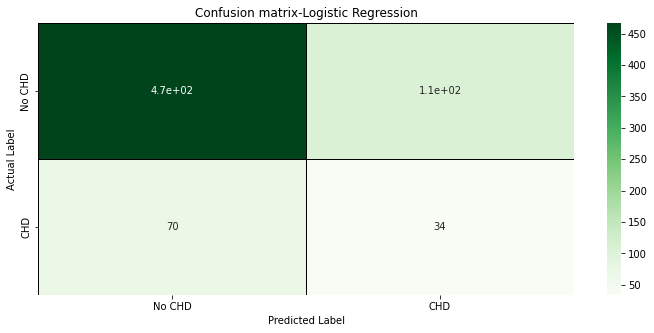

In [ ]:
# plot confusion matrix
plt.figure(figsize=(12,5))
ax=plt.subplot()
sns.heatmap(confusion_matrix_knn,annot=True,ax=ax,cmap='Greens', linecolor='Black', linewidths=1.0)
# set labels and title
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion matrix-Logistic Regression')
labels=['No CHD','CHD']
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

In [ ]:
# ROC AUC CURVE
def plot_roc_curve(fpr,tpr):
  plt.figure(figsize=(12,5))
  plt.plot(fpr,tpr,color='orange',label=auc_knn_cv)
  plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend()
  plt.show()

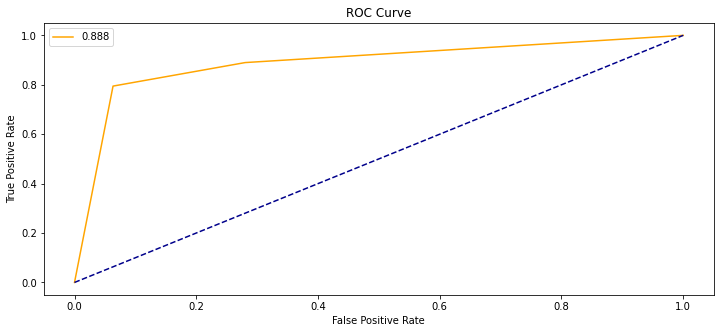

In [ ]:
# plot the ROC curve
fpr,tpr,thresold=roc_curve(y_test,y_test_pred_prob_knn_cv)
plot_roc_curve(fpr,tpr)

After hyper parameter tunning we found the follwing result.

AUC SCORE-0.88

RECALL-0.86

F1 SCORE-0.86

recall and f1 score is slightly better than logistic regression and auc score decrease.


### **ML Model - 3 Random Forest Classifier**

In [ ]:
# ML Model - 3 Implementation
rfc = RandomForestClassifier(random_state=2)
# Fit the Algorithm
rfc.fit(x_train, y_train)
# Predict on the model
rfc_y_pred = rfc.predict(x_test)
rfc_y_pred_proba = rfc.predict_proba(x_test)[:,1]

In [ ]:
# for confusion matrics 
confusion_matrix_rfc=confusion_matrix(y_test,rfc_y_pred)
print(confusion_matrix_rfc)

[[515  38]
 [ 86 513]]


In [ ]:
# classification report
classifcation_report_rfc=classification_report(y_test,rfc_y_pred)
print(classifcation_report_rfc)

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       553
           1       0.93      0.86      0.89       599

    accuracy                           0.89      1152
   macro avg       0.89      0.89      0.89      1152
weighted avg       0.90      0.89      0.89      1152



In [ ]:
auc_rfc = round(roc_auc_score(y_test,rfc_y_pred_proba), 3)
print(auc_rfc)

0.944


# 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques 
rfc_cv = RandomForestClassifier(random_state=2)

# GridSearch to find the best parameters
grid = {'n_estimators' : [250,300],
        'max_depth' : [14,16],
        'min_samples_split' : [12,16],
        'min_samples_leaf' : [12,16]}
rfc_grid = GridSearchCV(rfc_cv, param_grid = grid, cv=5)
# Fit the Algorithm
rfc_grid.fit(x_train, y_train)
best_model = rfc_grid.best_estimator_

# Predict on the model
rfc_cv_y_pred = best_model.predict(x_test)
rfc_cv_y_pred_proba = best_model.predict_proba(x_test)[:,1]

In [ ]:
rfc_grid.best_params_

{'max_depth': 14,
 'min_samples_leaf': 12,
 'min_samples_split': 12,
 'n_estimators': 250}

In [ ]:
# for confusion matrics 
confusion_matrix_rfc_cv=confusion_matrix(y_test,rfc_cv_y_pred)
print(confusion_matrix_rfc_cv)


[[507  46]
 [116 483]]


In [ ]:
# classification report
classifcation_report_rfc_cv=classification_report(y_test,rfc_cv_y_pred)
print(classifcation_report_rfc_cv)


              precision    recall  f1-score   support

           0       0.81      0.92      0.86       553
           1       0.91      0.81      0.86       599

    accuracy                           0.86      1152
   macro avg       0.86      0.86      0.86      1152
weighted avg       0.87      0.86      0.86      1152



In [ ]:
auc_rfc_cv = round(roc_auc_score(y_test,rfc_cv_y_pred_proba), 3)
print(auc_rfc_cv)

0.926


In [ ]:
# ROC AUC CURVE
def plot_roc_curve(fpr,tpr):
  plt.figure(figsize=(12,5))
  plt.plot(fpr,tpr,color='orange',label=auc_rfc_cv)
  plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend()
  plt.show()

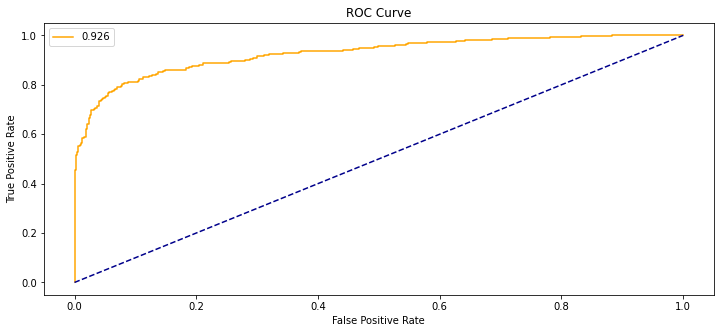

In [ ]:
# plot the ROC curve
fpr,tpr,thresold=roc_curve(y_test,rfc_cv_y_pred_proba)
plot_roc_curve(fpr,tpr)

We made our ml algorithm on ensamble technique called random forest.
by hyperparameter tunning we found the following result

AUC SCORE-0.92

RECALL-0.81

F1 SCORE-0.86
 WHICH is better result above all algorithm.

### **ML Model - 4 Naive-Bayes**

In [ ]:
# ML Model - 4 Implementation
nb = GaussianNB()
# Fit the Algorithm
nb.fit(x_train, y_train)
# Predict on the model
nb_y_pred = nb.predict(x_test)
nb_y_pred_proba = nb.predict_proba(x_test)[:,1]

In [ ]:
# for confusion matrics 
confusion_matrix_nb=confusion_matrix(y_test,nb_y_pred)
print(confusion_matrix_nb)

[[471  82]
 [178 421]]


In [ ]:
# classification report
classifcation_report_nb=classification_report(y_test,nb_y_pred)
print(classifcation_report_nb)


              precision    recall  f1-score   support

           0       0.73      0.85      0.78       553
           1       0.84      0.70      0.76       599

    accuracy                           0.77      1152
   macro avg       0.78      0.78      0.77      1152
weighted avg       0.78      0.77      0.77      1152



In [ ]:
# ROC score
auc_nb = round(roc_auc_score(y_test,nb_y_pred_proba), 3)
print(auc_nb)

0.831


In [ ]:
# ROC AUC CURVE
def plot_roc_curve(fpr,tpr):
  plt.figure(figsize=(12,5))
  plt.plot(fpr,tpr,color='orange',label=auc_nb)
  plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend()
  plt.show()

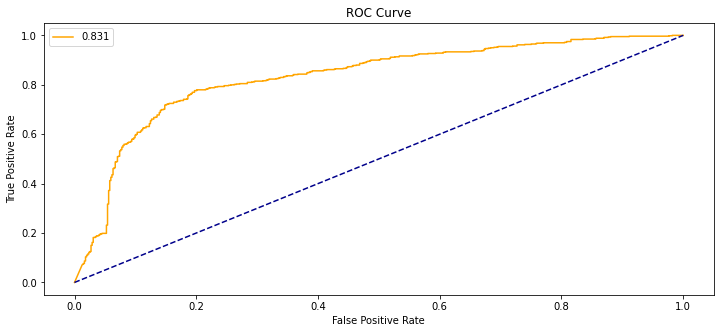

In [ ]:
# plot the ROC curve
fpr,tpr,thresold=roc_curve(y_test,nb_y_pred_proba)
plot_roc_curve(fpr,tpr)

BY navie bays algorithm we found the following result.

AUC SCORE-0.83

RECALL-0.70

F1 SCORE-0.76
  which is bad algorithm for our data set.

### **ML Model - 5 XG Boost Classifier**

In [ ]:
# ML Model -  Implementation
xgb = XGBRFClassifier()
# Fit the Algorithm
xgb.fit(x_train, y_train)
# Predict on the model
xgb_y_pred = xgb.predict(x_test)
xgb_y_pred_proba = xgb.predict_proba(x_test)[:,1]

In [ ]:
# for confusion matrics 
confusion_matrix_xgb=confusion_matrix(y_test,xgb_y_pred)
print(confusion_matrix_xgb)

[[467  86]
 [110 489]]


In [ ]:
# classification report
classifcation_report_xgb=classification_report(y_test,xgb_y_pred)
print(classifcation_report_xgb)

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       553
           1       0.85      0.82      0.83       599

    accuracy                           0.83      1152
   macro avg       0.83      0.83      0.83      1152
weighted avg       0.83      0.83      0.83      1152



In [ ]:
# ROC score
auc_xgb = round(roc_auc_score(y_test,xgb_y_pred_proba), 3)
print(auc_xgb)

0.905


#Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter 
xgb = XGBRFClassifier()

# GridSearch to find the best parameters
grid = {'n_estimators' : [150],
        'max_depth' : [8,10],
        'min_samples_split' : [50,100],
        'min_samples_leaf' : [30,50],
        }
xgb_cv= GridSearchCV(xgb, param_grid = grid, cv=5)

# Fit the Algorithm
xgb_cv.fit(x_train, y_train)
best_model_xgb = xgb_cv.best_estimator_
# Predict on the model
xgb_cv_y_pred = best_model_xgb.predict(x_test)
xgb_cv_y_pred_proba = best_model_xgb.predict_proba(x_test)[:,1]


In [ ]:
# for confusion matrics 
confusion_matrix_xgb_cv=confusion_matrix(y_test,xgb_cv_y_pred)
print(confusion_matrix_xgb_cv)

[[504  49]
 [108 491]]


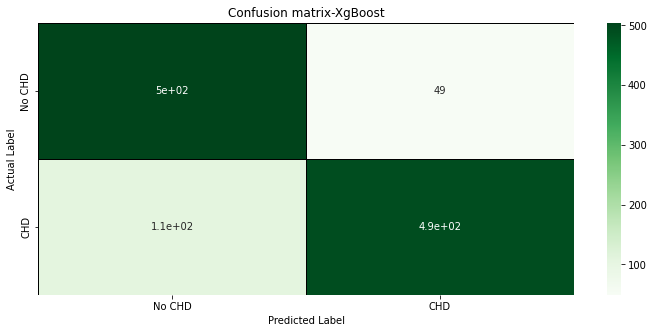

In [ ]:
# plot confusion matrix
plt.figure(figsize=(12,5))
ax=plt.subplot()
sns.heatmap(confusion_matrix_xgb_cv,annot=True,ax=ax,cmap='Greens', linecolor='Black', linewidths=1.0)
# set labels and title
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion matrix-XgBoost')
labels=['No CHD','CHD']
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

In [ ]:
# classification report
classifcation_report_xgb_cv=classification_report(y_test,xgb_cv_y_pred)
print(classifcation_report_xgb_cv)

              precision    recall  f1-score   support

           0       0.82      0.91      0.87       553
           1       0.91      0.82      0.86       599

    accuracy                           0.86      1152
   macro avg       0.87      0.87      0.86      1152
weighted avg       0.87      0.86      0.86      1152



In [ ]:
# ROC score
auc_xgb_cv = round(roc_auc_score(y_test,xgb_cv_y_pred_proba), 3)
print(auc_xgb)

0.93


In [ ]:
# ROC AUC CURVE
def plot_roc_curve(fpr,tpr):
  plt.figure(figsize=(12,5))
  plt.plot(fpr,tpr,color='orange',label=auc_xgb_cv)
  plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend()
  plt.show()

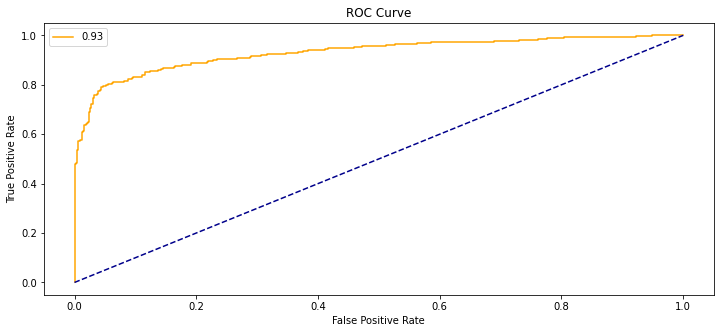

In [ ]:
# plot the ROC curve
fpr,tpr,thresold=roc_curve(y_test,xgb_cv_y_pred_proba)
plot_roc_curve(fpr,tpr)

BY xg Boost classifier we found the result which is below.

AUC SCORE-0.93

RECALL- 0.82

F1 SCORE- 0.86

Among above all algorithm xgboost give best auc score .f1 score is bettr. 

#**Combined ROC curve for all the models**

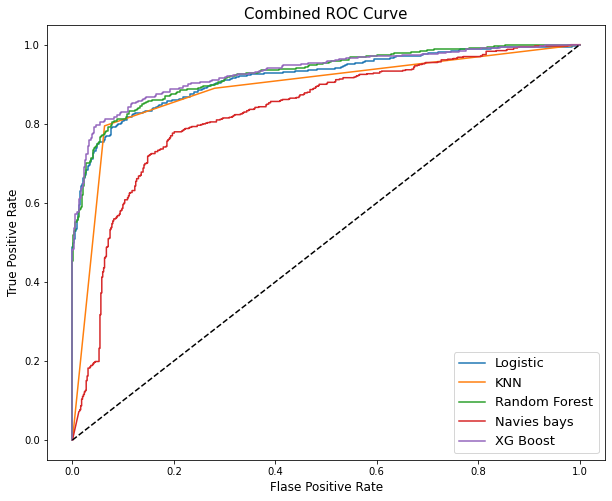

In [ ]:
# plotting the all roc curve together for analysis.
fig = plt.figure(figsize=(10,8)) 

fpr_lgr_optimal_model, tpr_lgr_optimal_model, _lgr_optimal_model = roc_curve(y_test,y_test_pred_prob_lgr_grid)
fpr_knn_optimal_model, tpr_knn_optimal_model, _knn_optimal_model = roc_curve(y_test,y_test_pred_prob_knn_cv)
fpr_best_model, tpr_best_model, _best_model = roc_curve(y_test,rfc_cv_y_pred_proba)
fpr_nb, tpr_nb, _nb = roc_curve(y_test, nb_y_pred_proba )
fpr_best_model_xgb, tpr_best_model_xgb, _best_model_xgb = roc_curve(y_test, xgb_cv_y_pred_proba)

plt.plot(fpr_lgr_optimal_model, tpr_lgr_optimal_model)
plt.plot(fpr_knn_optimal_model, tpr_knn_optimal_model)
plt.plot(fpr_best_model, tpr_best_model)
plt.plot(fpr_nb, tpr_nb)
plt.plot(fpr_best_model_xgb, tpr_best_model_xgb)

plt.plot([0,1], [0,1], color='black', linestyle='--')

plt.xlabel("Flase Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title('Combined ROC Curve', fontsize=15)

plt.legend(["Logistic", "KNN", "Random Forest", "Navies bays", "XG Boost"], prop={'size':13}, loc='lower right' )

by comparing the combined roc curve we can say that xgboost classifier roc curve give highest area under the curve which is 0.93.


#Feature Importance On XGBOOST Model

In [ ]:
features=['age','prevalentHyp','totChol','BMI','heartRate','glucose','sex_M','education_1.0', 'education_2.0',
          'education_3.0','prevalentStroke_0','BPMeds_0.0','BP_1', 'BP_2', 'BP_3', 'BP_5',
          'cigsPerDay_Average consumtion','cigsPerDay_High Consumption', 'cigsPerDay_No Consumption','diabetes_0']

In [ ]:
feature=Final_df

In [ ]:
feature_importances_best_model_xgb = best_model_xgb.feature_importances_

In [ ]:
feature_importances_xgb_df = pd.Series(feature_importances_best_model_xgb, index=features)

In [ ]:
feature_importances_xgb_df.sort_values(ascending=False)[0:12]

BP_3                             0.291271
BP_1                             0.265909
BP_2                             0.078170
prevalentHyp                     0.064093
cigsPerDay_High Consumption      0.061788
cigsPerDay_Average consumtion    0.049930
cigsPerDay_No Consumption        0.044349
education_2.0                    0.032276
education_3.0                    0.019916
diabetes_0                       0.015996
education_1.0                    0.015704
prevalentStroke_0                0.010926
dtype: float32

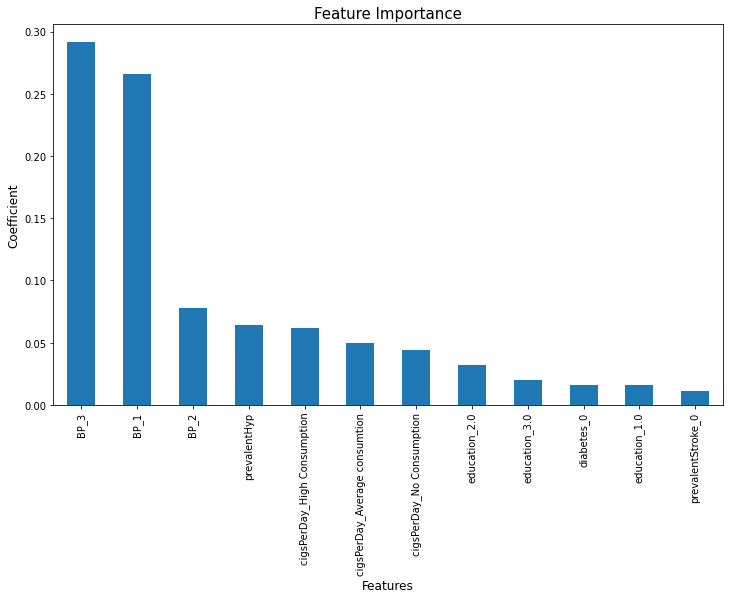

In [ ]:
fig = plt.figure(figsize=(12,7)) 
feature_importances_xgb_df.nlargest(12).plot(kind='bar')
plt.xlabel("Features", fontsize=12)
plt.ylabel("Coefficient", fontsize=12)
plt.title('Feature Importance', fontsize=15)
plt.show()

* Above 12 features are the most important features of Xgboost classifier.

* BP parameter and cigreate consumption and prevalent hyper tension play a very imortant role in the xgboost algorithm.

# **Conclusion for EDA**

 :- 
*  Our data set has 17 features & 3390 rows. We studied all these features and have drawn following comclusions:
 
  * The very first graphs gives us the distribution of dependent variable and whch shows that very less no of peoples are prone to cardiovascular risk.
  * Inferences drawn  from Countplots of the numerical features were; 
  
>>>>| Field | Normal range |
|-------|-------------|
|Total cholestrol|< 200 mg/dL|
|Normal BP|120/80 mmHg|
|BMI|18.5 to 25|
|Heartrate|70-80 bpm|
|Glucose|100|

  * Any value outiside the given normal range determines higher risk of cardiovascular risk. Thus, various companies like insurance, healthcare, fitness-nutrition and medical can target this population for better revenue generation.

  * We have observed that people wether or not smoking are at equal risk of cardio vascular diseases, which suggests companies to target them equally.
  * Our data shows that people having hypertension are more prone to cardio vascular diseases, very less no. of paitents are on BpMeds, but 50 % of then are at cardiovascular risk, which is significant. Thus, this information can be leveraged by various companies. 
  * Distribution of cardiovascular Risk and Age shows that with increase in age chances of having cardiovascular diseases increases.
  * Diabetic patients are high risk of getting cardio vascular disease as our data shows; diabetic population is at high risk.
  * Gender distribution shows that males are more prone to cardio vascular risk as compared to females because the frequency of males having smoking habits is more.
  * Another bivariate plot between Systolic and diastolic BP shows that they are positivly correalted and with increase in any of this values increses the ridk of cardiovascular diseases.
  * Orderwise correlation shows that age and systolic pressure highly affect our dependent variable.

#**Conclusion For Model Training**

* Our dependent variable is "TenyearCHD" which determines, people having cardiovascular issue in ten years of span.

* We perform 5 different algorithms for model training namely, logistic regression, KNN,RandomForestClassifier, Naive-Bayes, XGBclassifier.

* Evalution metrics for this project were f1 score and recall, as our data was highly imbalance it would have given us false accuracy, f1 which is the averge of presicion and recall might give us better predictions than accuracy. In our case no of False negatives can have a huge bussiness cost, therefore, instead of precision recall is the more appropiate metrics for evalution.

* Out of all the five algorithms Xgboost classifier was found to be more efficient for model training as it has 0.93 Auc score score,f1 score is 0.86 and recall value is 0.82.
* So we tried setting an optimum hyperparameter to prevent overfitting of the model. 

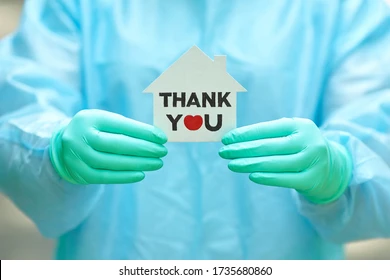